(2766, 1931)
uint8
ROI (x, y, w, h) :  (0, 150, 1931, 2766)
때     ~   < 노
엮 ㅜㅜ 증
상 호: 일일향(성수점)10호
사업자번호: 754-36-00561 대표자:강성한
주 소: 서울 성동구 성수일로6길 47 (성수
2024년07월03일 12:20 46:0017 01-은 ㅅ
메뉴명           단가 수량    금액
 짜장면 곱빼기     10.000 1 _ 10,000
짜장면                        8.000 1 8,000
옛날짱붕                   10,000 _ 1 _ 10000
잡채밥          11000 _ 1 __11.000
옛날볶음밥                  9,000 1 _ 9,000
판매글애       48. 000
과세상품금액                43, 637
부가세 (41)금액                4, 363
거신글액       48. 000
신용카드       48,000



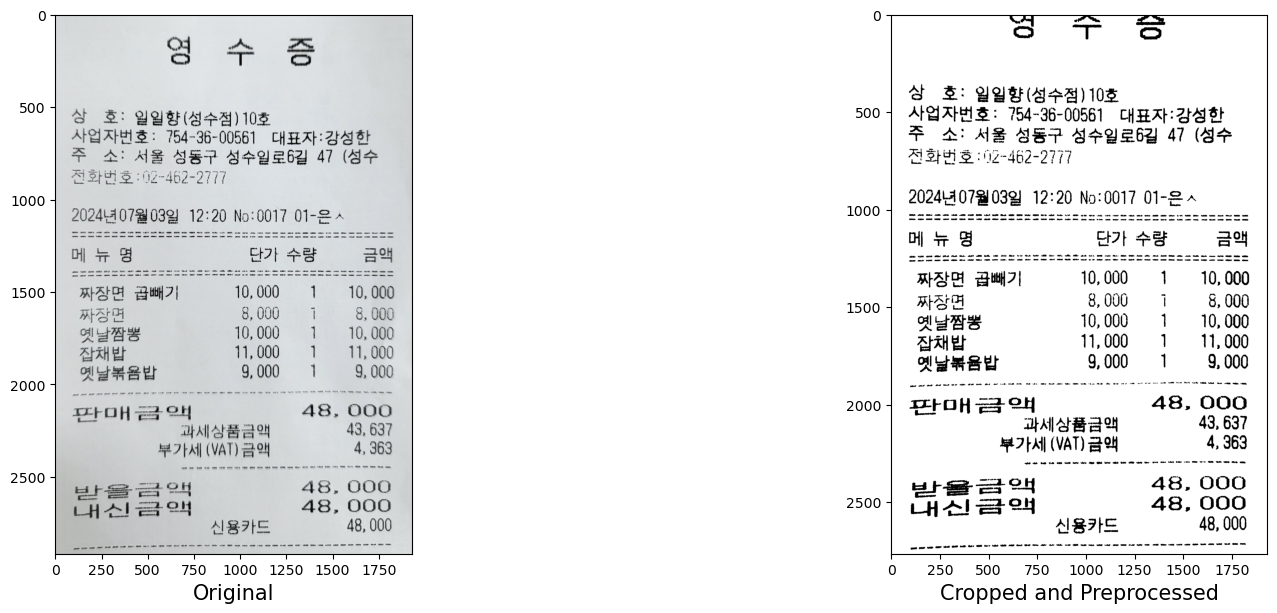

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

def preprocess_image(image):
    # 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용하여 노이즈 제거
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)를 사용하여 대비 증가
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blurred)
    
    # 이진화 처리 (binary thresholding) 적용
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary

def read_pytesseract(image):
    # PSM(페이지 세그먼트 모드) 값 설정 실험
    custom_config = r'--oem 3 --psm 6'  # 다른 PSM 값 (예: 1, 3, 6, 11)으로 시도 가능
    results = pytesseract.image_to_string(image, lang='kor', config=custom_config)
    return results

# 이미지 로드 (BGR 형식)
path = 'image4.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.xlabel("Original", fontsize=15)

# 이미지 크기 가져오기
height, width = image.shape[:2]

# 원본 이미지의 좌표 설정
x1, y1 = 0, 0
x2, y2 = width, 0
x3, y3 = 0, height
x4, y4 = width, height

# 원래 이미지에서 차지하는 부분 좌표 설정
src_points = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

# 결과 이미지에서 원래 이미지 크기 그대로 자르기 위한 좌표 설정
dst_points = np.float32([[0, 0], [x2, 0], [0, y3], [x4, y4]])

# 변환 매트릭스 계산
M = cv2.getPerspectiveTransform(src_points, dst_points)

# 이미지 변환
transformed_image = cv2.warpPerspective(image, M, (width, height))

# 관심 영역(ROI) 설정 (x, y, w, h)
getROI = (0, 150,  width, height - 150)

# 이미지 자르기
cropped_image = transformed_image[getROI[1]:getROI[1]+getROI[3], getROI[0]:getROI[0]+getROI[2]]

# 전처리 후 결과 확인
preprocessed_image = preprocess_image(cropped_image)

print(preprocessed_image.shape)
print(preprocessed_image.dtype)

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image, cmap='gray')
plt.xlabel("Cropped and Preprocessed", fontsize=15)
print("ROI (x, y, w, h) : ", getROI)

# Tesseract 실행 파일 경로 설정
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Tesseract OCR 실행
text = read_pytesseract(preprocessed_image)
print(text)
